In [43]:
# Buisness understanding...

#We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. 
#As a data scientist we all should do better. What if you have data that records important details about a doctor and you 
#get to build a model to predict the doctor’s consulting fee.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
########Read the test and train data..
TrainDs=pd.read_csv('D:\\DataScience\\Hackathon\\FinalParticipantDataFolder\\Final_Train.csv',skipinitialspace=True)
TestDs=pd.read_csv('D:\\DataScience\\Hackathon\\FinalParticipantDataFolder\\Final_Test.csv')

In [45]:
TrainDs.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [46]:
TrainDs.shape

(5961, 7)

In [47]:
## Lets find the structure of the data..
TrainDs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [48]:
TestDs=pd.read_csv('D:\\DataScience\\Hackathon\\FinalParticipantDataFolder\\Final_Test.csv')

In [49]:
TestDs.shape

(1987, 6)

In [50]:
TestDs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null object
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: object(6)
memory usage: 93.2+ KB


In [51]:
TrainDs.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [52]:
#### EDA...

# misisng values in Rating,Miscellaneous_Info,Place.... ### Will not be wise to remove enteries from Miscellaneous_Info and Rating
 #Lets check ##Places..... (.003%) Misisng data...
### First the data needs to be cleaned..

#TrainDs['Rating']=TrainDs['Rating'].replace('%','')
TrainDs['Rating']=TrainDs['Rating'].astype(str).apply(lambda x:x.replace('%',''))
TrainDs['Rating'].head()
TrainDs['Rating']=TrainDs['Rating'].apply(pd.to_numeric, errors='coerce')
TrainDs['Rating'].fillna(pd.to_numeric(TrainDs['Rating']).mean(),inplace=True)
TrainDs['Rating']=TrainDs['Rating'].astype(int)

#TrainDs['Rating'].fillna(pd.to_numeric(TrainDs['Rating']).mean(),inplace=True)
#TrainDs['Rating']=TrainDs['Rating'].astype(int)
# replace('[^1-9\s]+', '',regex=True)
# data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
## change 'experience' column as experience(years)---
TestDs['Rating']=TestDs['Rating'].astype(str).apply(lambda x:x.replace('%',''))
TestDs['Rating'].head()
TestDs['Rating']=TestDs['Rating'].apply(pd.to_numeric, errors='coerce')
TestDs['Rating'].fillna(pd.to_numeric(TestDs['Rating']).mean(),inplace=True)
TestDs['Rating']=TestDs['Rating'].astype(int)


In [53]:
TrainDs=TrainDs.rename(columns = {'Experience':'Experience (years)'})
TestDs=TestDs.rename(columns = {'Experience':'Experience (years)'})
# TestDs
#TrainDs['Experience (years)']=TrainDs['Experience (years)'].map(lambda x: x.rstrip('aAbBcC'))
#TrainDs['Experience (years)']=TrainDs['Experience (years)'].map(lambda x: x.rstrip('aAbBcC'))
# TrainDs['Experience (years)'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
#TrainDs['Experience (years)']=TrainDs['Experience (years)'].str.replace("\s:00", "")

In [54]:
TrainDs.head()

,Qualification,Experience (years),Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,94,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [55]:
TestDs.head()

,Qualification,Experience (years),Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,94,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,94,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,94,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [56]:
# df['col'] = df['col'].replace('T', ' ', regex=True)
TrainDs['Experience (years)']=TrainDs['Experience (years)'].str.replace('[^0-9\s]+', '',regex=True)
TestDs['Experience (years)']=TestDs['Experience (years)'].str.replace('[^0-9\s]+', '',regex=True)
# replace('[^A-Za-z\s]+', '')
#TrainDs['Experience (years)']

In [57]:
TestDs.head()

,Qualification,Experience (years),Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,94,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,94,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,94,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [58]:
TrainDs.head()
TrainDs.to_csv("TrainDsCSV.csv")

In [59]:
#TrainDs[["Locality","City"]]=TrainDs['Place'].str.split(',',n=1,expand=True,)
TrainDs[["Locality","City"]]=TrainDs['Place'].str.split(',',n=1,expand=True)
TestDs[["Locality","City"]]=TestDs['Place'].str.split(',',n=1,expand=True)

In [60]:
TrainDs=TrainDs.drop(['Locality','Place'],axis=1)
TestDs=TestDs.drop(['Locality','Place'],axis=1)

In [61]:
TestDs.head()

,Qualification,Experience (years),Rating,Profile,Miscellaneous_Info,City
0,MBBS,35,94,General Medicine,NaN,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,94,ENT Specialist,NaN,Hyderabad
2,"MBBS, DDVL",40,70,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai
3,BAMS,0,94,Ayurveda,NaN,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore


In [62]:
## Lets drop colmn Miscellaneos info.. as we cant get much insight form it
TrainDs=TrainDs.drop(['Miscellaneous_Info'],axis=1)
TrainDs
TestDs=TestDs.drop(['Miscellaneous_Info'],axis=1)

In [63]:
finalDs=TrainDs
finalDs.head()
# np.concatenate((a, b), axis=0)
# pd.concat([df1, df2], axis=1, ignore_index=True)

,Qualification,Experience (years),Rating,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,94,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,94,Ayurveda,250,Bangalore
4,BAMS,20,100,Ayurveda,250,Chennai


In [64]:
finalDs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
Qualification         5961 non-null object
Experience (years)    5961 non-null object
Rating                5961 non-null int32
Profile               5961 non-null object
Fees                  5961 non-null int64
City                  5935 non-null object
dtypes: int32(1), int64(1), object(4)
memory usage: 256.2+ KB


In [65]:
## Lets convert the dataset into approprita datatypes..
# finalDataset['Rating']=finalDataset['Rating'].apply(pd.to_numeric, errors='coerce')
finalDs['Experience (years)']=pd.to_numeric(finalDs['Experience (years)'], errors='coerce')
TestDs['Experience (years)']=pd.to_numeric(TestDs['Experience (years)'], errors='coerce')

In [67]:
TestDs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
Qualification         1987 non-null object
Experience (years)    1987 non-null int64
Rating                1987 non-null int32
Profile               1987 non-null object
City                  1981 non-null object
dtypes: int32(1), int64(1), object(3)
memory usage: 69.9+ KB


In [68]:
### Lets prepare the data for modelling...
finalDs.head()

,Qualification,Experience (years),Rating,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,94,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,94,Ayurveda,250,Bangalore
4,BAMS,20,100,Ayurveda,250,Chennai


In [69]:
## Lets chekc for na
finalDs.apply(lambda x:x.isnull().sum())

Qualification          0
Experience (years)     0
Rating                 0
Profile                0
Fees                   0
City                  26
dtype: int64

In [70]:
TestDs.apply(lambda x:x.isnull().sum())

Qualification         0
Experience (years)    0
Rating                0
Profile               0
City                  6
dtype: int64

In [71]:
finalDs=finalDs.replace('nan', np.nan)
finalDs.head()
TestDs=TestDs.replace('nan', np.nan)

In [72]:
finalDs['Rating']=finalDs['Rating'].apply(pd.to_numeric, errors='coerce')
finalDs['Rating'].fillna(pd.to_numeric(finalDs['Rating']).mean(),inplace=True)
finalDs['Rating']=finalDs['Rating'].astype(int)

In [73]:
TestDs['Rating']=TestDs['Rating'].apply(pd.to_numeric, errors='coerce')
TestDs['Rating'].fillna(pd.to_numeric(TestDs['Rating']).mean(),inplace=True)
TestDs['Rating']=TestDs['Rating'].astype(int)

In [74]:
finalDataset=finalDs.dropna()
finalDataset.apply(lambda x:x.isnull().sum())

Qualification         0
Experience (years)    0
Rating                0
Profile               0
Fees                  0
City                  0
dtype: int64

In [75]:
finaltestDataset=TestDs.dropna()
finaltestDataset.apply(lambda x:x.isnull().sum())

Qualification         0
Experience (years)    0
Rating                0
Profile               0
City                  0
dtype: int64

In [76]:
CL_CONTINUOS_COLUMNS=finalDataset._get_numeric_data().columns
finalDataset[CL_CONTINUOS_COLUMNS].corr()
finalDataset.shape
### not much corelation among varaibles...

(5935, 6)

#### lets deal with dummy data...
finalDataset1=pd.get_dummies(finalDataset,drop_first=True)

In [77]:

## Lets remove columns not required for modleing
# 1. Qualfication.. Alreday broken into Degrees/ no of degrees and field
finalDataset1=finalDataset.drop('Qualification',axis=1)
### Lets replace Locality by most requent ones in city ### going back to EDA
finalDataset1.head()
finaltestDataset1=finaltestDataset.drop('Qualification',axis=1)

In [78]:
CL_CATEGORICAL_COLUMNS=finalDataset1.select_dtypes(exclude=['int', 'float','int64']).columns
#CL_CATEGORICAL_COLUMNS

for column in CL_CATEGORICAL_COLUMNS:
    print(finalDataset1[column].value_counts()[0:5])
    ## As very less people have more than one degree hense dropping Degree-2,degree3,degree4... and tehir fields as you find most arre
    # empty values
    
CL_CATEGORICAL_COLUMNS=['Profile','Locality','City']   

Dentist             1396
General Medicine    1173
Dermatologists      1009
Homeopath            843
Ayurveda             786
Name: Profile, dtype: int64
 Bangalore    1258
 Mumbai       1219
 Delhi        1184
 Hyderabad     951
 Chennai       855
Name: City, dtype: int64


a=list(filter(None,finalDataset1['Degree2'].value_counts()[0:3].index))
a

for column in CL_CATEGORICAL_COLUMNS:
    topvalue=list(filter(None,finalDataset1['Degree2'].value_counts().index))

### replace the blanks with most common values..
## Profile
import random
for column in CL_CATEGORICAL_COLUMNS:
    topvalue=list(filter(None,finalDataset1[column].value_counts()[0:3].index))
    for x in finalDataset1.index.values:
        finalDataset1.set_value(x,column,random.choice(topvalue))
        
        # filter(None, lst)

In [79]:
finalDataset1.head()

finalDataset1['City'].value_counts()


 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5, Delhi          1
Name: City, dtype: int64

In [80]:
#finalDataset1['City'].str.Replace(' Sector 5, Delhi',' Delhi')
finalDataset1['City']=finalDataset1['City'].astype(str).apply(lambda x:x.replace(' Sector 5, Delhi',' Delhi'))
finalDataset1['City'].value_counts()
# TestDs['Rating']=TestDs['Rating'].astype(str).apply(lambda x:x.replace('%',''))

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Name: City, dtype: int64

In [81]:
finalDataset1['Profile'].value_counts()

Dentist             1396
General Medicine    1173
Dermatologists      1009
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [82]:
finaltestDataset1.head()

,Experience (years),Rating,Profile,City
0,35,94,General Medicine,Mumbai
1,31,94,ENT Specialist,Hyderabad
2,40,70,Dermatologists,Chennai
3,0,94,Ayurveda,Delhi
4,16,100,Dentist,Bangalore


In [83]:
finaltestDataset1['City'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Name: City, dtype: int64

In [84]:
finaltestDataset1['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      333
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [85]:
finaltestDataset1.shape

(1981, 4)

In [86]:
finalDataset1.shape

(5935, 5)

In [87]:
finalDataset1=pd.get_dummies(finalDataset1,drop_first=True)
finaltestDataset1=pd.get_dummies(finaltestDataset1,drop_first=True)
#finalDataset1=pd.get_dummies(finalDataset1.drop('Locality',axis=1),drop_first=True)

In [88]:
finalDataset1.head()

,Experience (years),Rating,Fees,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram
0,24,100,100,0,0,0,0,1,0,0,0,1,0,0,0
1,12,98,350,0,0,0,0,0,0,0,0,0,0,0,0
2,9,94,300,0,0,1,0,0,0,0,0,0,0,0,0
3,12,94,250,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100,250,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:
finaltestDataset1.head()

,Experience (years),Rating,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram
0,35,94,0,0,0,1,0,0,0,0,0,0,1,0
1,31,94,0,0,1,0,0,0,0,0,0,1,0,0
2,40,70,0,1,0,0,0,1,0,0,0,0,0,0
3,0,94,0,0,0,0,0,0,0,1,0,0,0,0
4,16,100,1,0,0,0,0,0,0,0,0,0,0,0


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(finalDataset1.drop('Fees',axis=1), finalDataset1[['Fees']], test_size=0.3)

In [91]:
def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))

In [92]:
finalDataset1.shape

(5935, 15)

In [93]:
finaltestDataset1.shape

(1981, 14)

In [94]:
# finaltestDataset1 # finalDataset1
X_train, X_test, y_train, y_test = train_test_split(finalDataset1.drop('Fees',axis=1), finalDataset1[['Fees']], test_size=0.3)
X_test1=finaltestDataset1

In [95]:
X_train.shape

(4154, 14)

In [96]:
X_test.shape

(1781, 14)

In [97]:
X_test1.shape

(1981, 14)

In [98]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
yd_lm = lm.predict(X_test)
rmse_linear = rmse(y_test, yd_lm)
print("RMSE for Linear Regression Model in sklearn: %.2f" % rmse_linear)

RMSE for Linear Regression Model in sklearn: 176.46


In [99]:
yd_lm1 = lm.predict(X_test1.head(1781))
rmse_linear1 = rmse(y_test, yd_lm1)
print("RMSE for Linear Regression Model in sklearn: %.2f" % rmse_linear1)

RMSE for Linear Regression Model in sklearn: 206.03


In [100]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, yd_lm))
print('MSE:', metrics.mean_squared_error(y_test, yd_lm))

MAE: 139.17244360508033
MSE: 31137.83729142813


In [101]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, yd_lm1))
print('MSE:', metrics.mean_squared_error(y_test, yd_lm1))

MAE: 167.70503671912613
MSE: 42449.95162050303


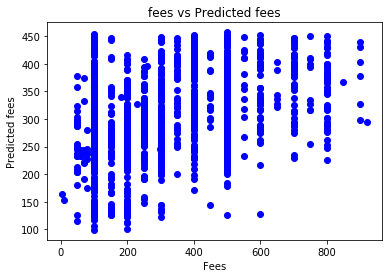

In [102]:
plt.scatter(y_test, yd_lm, color='blue')
plt.xlabel("Fees")
plt.ylabel("Predicted fees")
plt.title("fees vs Predicted fees")
plt.show()

In [103]:
# Using Decision Tree Regressor to Predict the Doctor Fees
#importing the library for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

#Initializing the Deision Tree Regressor
dtr = DecisionTreeRegressor()

# Fitting the Decision Tree Regressor with training Data
dtr.fit(X_train,y_train)

# Predicting the values(Fees) for Test Data
#Y_pred_fee = scaler.inverse_transform(dtr.predict(X_test))
"""NOTE:scaler.inverse_transform is used to inverse the scaling"""
print("R-Squared on train dataset={}".format(dtr.score(X_train,y_train)))
#rmse_linear = rmse(y_test, Y_pred_fee)
#print("RMSE for Decision tree regressor in sklearn: %.2f" % rmse_linear)
# Saving the Predicted values in to an Excel file
#pd.DataFrame(Y_pred_dtr, columns = ['Fees']).to_excel("predictions_tree.xlsx", index = False)
dtr.fit(X_test,y_test)   
  

print("R-Squaredon test dataset={}".format(dtr.score(X_test,y_test)))

R-Squared on train dataset=0.7080602057467629
R-Squaredon test dataset=0.815642531177939


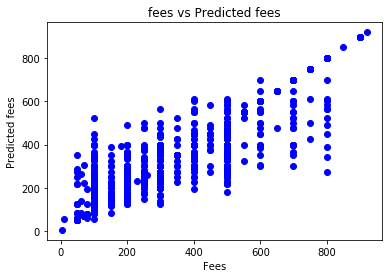

In [104]:
pred_fee = dtr.predict(X_test)
#rmse_decisiontree = rmse(y_test, pred_fee)
#print("RMSE for Decsion tree in sklearn: %.2f" % rmse_decisiontree)
plt.scatter(y_test, pred_fee, color='blue')
plt.xlabel("Fees")
plt.ylabel("Predicted fees")
plt.title("fees vs Predicted fees")
plt.show()

In [105]:
finalDataset1.head()

,Experience (years),Rating,Fees,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram
0,24,100,100,0,0,0,0,1,0,0,0,1,0,0,0
1,12,98,350,0,0,0,0,0,0,0,0,0,0,0,0
2,9,94,300,0,0,1,0,0,0,0,0,0,0,0,0
3,12,94,250,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100,250,0,0,0,0,0,1,0,0,0,0,0,0


In [212]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_tests = train_test_split(finalDataset1.drop('Fees',axis=1),finalDataset1['Fees'], test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

regressor = RandomForestRegressor(n_estimators=100, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [213]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_tests, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_tests, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_tests, y_pred)))  

Mean Absolute Error: 148.78355262571847
Mean Squared Error: 38622.96931457507
Root Mean Squared Error: 196.52727371684335


Mean Absolute Error: 147.49971440816068
Mean Squared Error: 37834.07512876737
Root Mean Squared Error: 194.5098329873515

In [214]:
errors = abs(y_pred - y_tests)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_tests)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 148.78
Accuracy: 22.37 %.


In [215]:
##3 Ridge and Lasso regressor...
X_train, X_test, y_train, y_tests = train_test_split(finalDataset1.drop('Fees',axis=1),finalDataset1['Fees'], test_size = 0.25, random_state = 0)
X = finalDataset1.drop('Fees',axis=1).as_matrix()
y=finalDataset1['Fees'].values

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
# create a lasso regressor
lasso = Lasso(alpha=0.2, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ -0.          -0.         -27.97876004  65.71988465  45.32748656
   0.           0.          -0.         -53.72667795  21.61553694
 -13.06182171  -0.           0.          -0.          -0.        ]


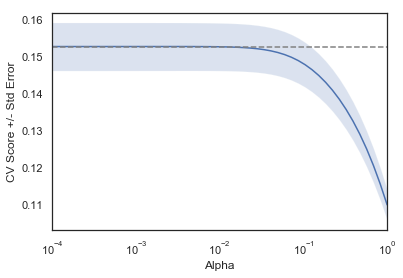

In [218]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)